Recognizing faces in images (recognize_faces_image.py)
https://www.pyimagesearch.com/2018/06/18/face-recognition-with-opencv-python-and-deep-learning/

To execute , run below commans :-
python recognize_faces_image.py --encodings encodings.pickle \
	--image examples/example_01.png

In [2]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 33kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=a90414ed7084e415b007e554485ca8035fb851967391d996c1d03b9e3f6fe899
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [11]:
# import the necessary packages
import argparse
import pickle
import cv2
import face_recognition
from google.colab import drive
from google.colab.patches import cv2_imshow  #cv2.imshow crashes Jupyter session

In [6]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
% cd /content/gdrive/My Drive/FaceRecog_AltMethod

/content/gdrive/My Drive/FaceRecog_AltMethod


In [ ]:
# construct the argument parser and parse the arguments
# --encodings : The path to the pickle file containing our face encodings.
# --image : This is the image that is undergoing facial recognition.
# --detection-method : You should be familiar with this one by now — we’re either going to use a hog or cnn method depending on the 
#                      capability of your system. For speed, choose hog and for accuracy, choose cnn

# If you are running face recognition on CPU, use detection_method as hog i/o CNN
'''
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--encodings", required=True,
	help="path to serialized db of facial encodings")
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-d", "--detection-method", type=str, default="cnn",
	help="face detection model to use: either `hog` or `cnn`")
args = vars(ap.parse_args())
'''

[INFO] loading encodings...
[INFO] recognizing faces...


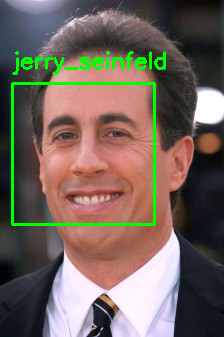

-1

In [14]:
# load the known faces and embeddings
print("[INFO] loading encodings...")
#data = pickle.loads(open(args["encodings"], "rb").read())
data_known_encoding = pickle.loads(open("encodings.pickle", "rb").read())

# load the input image and convert it from BGR to RGB
#image = cv2.imread(args["image"])
#image_unknown = cv2.imread("testimages/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg")
image_unknown = cv2.imread("testimages/httpcdnssninsidercomwpcontentuploadsjerryseinfeldxjpg.jpg")
rgb_unknown = cv2.cvtColor(image_unknown, cv2.COLOR_BGR2RGB)

# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
#get the face encodings for the UNKNOWN input image
#boxes = face_recognition.face_locations(rgb,model=args["detection_method"])
boxes_unknown = face_recognition.face_locations(rgb_unknown,model="cnn")
encodings_unknown = face_recognition.face_encodings(rgb_unknown, boxes_unknown)

# initialize the list of names for each face detected
names = []

# loop over the facial embeddings
for encoding_unknown in encodings_unknown:
	# attempt to match each face in the input image to our known encodings
  #This function returns a list of True /False values, one for each image in our dataset. 
  #For our Jurassic Park example, there are 218 images in the dataset and therefore the returned list will have 218 boolean values.

  #Internally, the compare_faces function is computing the Euclidean distance between the candidate embedding and all faces in our dataset:
  #If the distance is below some tolerance (the smaller the tolerance, the more strict our facial recognition system will be) then we 
  #return True , indicating the faces match. Otherwise, if the distance is above the tolerance threshold we return False as the faces do not match.
	matches = face_recognition.compare_faces(data_known_encoding["encodings"],	encoding_unknown)
	name = "Unknown"

  	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data_known_encoding["names"][i]
			counts[name] = counts.get(name, 0) + 1
		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)
 
#loop over the bounding boxes and labeled names for each person and draw them on our output image for visualization purposes
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes_unknown, names):
	# draw the predicted face name on the image
	cv2.rectangle(image_unknown, (left, top), (right, bottom), (0, 255, 0), 2)
	y = top - 15 if top - 15 > 15 else top + 15
	cv2.putText(image_unknown, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,	0.75, (0, 255, 0), 2)

# show the output image
#cv2.imshow("Image", image_unknown)
cv2_imshow(image_unknown)
cv2.waitKey(0)